# Calibration Rectangle 

150mm x 50mm rectangle for calibration purposes
splay the image.

In [1]:
import gcode
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import requests

esphome_cfg = {
    "host": "cnc.lan",
    "id": "cnc_relay"
}

base_url = f"http://{esphome_cfg['host']}/switch/{esphome_cfg['id']}"
base_url

'http://cnc.lan/switch/cnc_relay'

In [4]:
r = requests.post(f"{base_url}/turn_on")
assert r.status_code == 200

r = requests.get(f"{base_url}")
assert r.json()["state"] == "ON"
assert r.json()["value"]

In [5]:
import sys

# https://github.com/jed-frey/build_opencv
sys.path.append("/opt/opencv4/lib/python3.8/site-packages")

import cv2
from PIL import Image
from IPython.display import display

import timeout_decorator

class VideoCapture2(cv2.VideoCapture):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    @property
    def frame(self):
        ret, frame = self.read()
        if ret:
            return frame
        else:
            raise Exception("Reading Failed")
        
    def pil_img(self):
        img = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
        return Image.fromarray(img)
    
    def __enter__(self):
        return self
    
    @timeout_decorator.timeout(10)
    def __exit__(self,type, value, traceback):
        while self.isOpened():
            self.release() 

            
import IPython.core.magic
@IPython.core.magic.register_line_magic
def webcam(*args, **kwargs):
    webcams = [arg for arg in args[0].split(" ")]
    for webcam in webcams:
        if webcam.startswith("/dev/video"):
            webcam = int(webcam.split("/dev/video")[-1])
        else:
            try:
                webcam = int(webcam)
            except:
                pass
        with VideoCapture2(webcam) as cap:
            img = cap.pil_img()
            display(img)

In [8]:
r = requests.post(f"{base_url}/turn_on")
assert r.status_code == 200

r = requests.get(f"{base_url}")
assert r.json()["state"] == "ON"
assert r.json()["value"]

import grbl

with grbl.Grbl(port="/dev/ttyUSB1") as cnc:
    cnc.home()

In [9]:
def init():
    prog = gcode.GCode()
    prog.G92(X=0, Y=0, Z=0) 
    prog.G21() # Metric
    prog.G90() # Absolute
    return prog

In [11]:
with grbl.Grbl(port="/dev/ttyUSB1") as cnc:
    cnc.home()
    cnc.run(init())

100%|██████████| 3/3 [00:00<00:00,  9.48it/s]


In [18]:
with grbl.Grbl(port="/dev/ttyUSB1") as cnc:
    cnc.home()
    cnc.run(init())
    laserin_speed=200
    laserin_power=200
    base_line = gcode.Line(gcode.hline(X0=0, Xf=200), feed=laserin_speed, power=laserin_power)
    cnc.run(base_line)

100%|██████████| 4/4 [00:00<00:00,  9.43it/s]


In [20]:
cnc = grbl.Grbl(port="/dev/ttyUSB1")
cnc.run("G0X0F400")

100%|██████████| 1/1 [00:00<00:00,  9.50it/s]


25.095324516296387

In [ ]:
gcode.Line(gcode.hline(X0=0, Xf=200), feed=laserin_speed, power=laserin_power)


In [21]:
base_line = gcode.Line(gcode.vline(Y0=0, Yf=200), feed=laserin_speed, power=laserin_power)

In [22]:
base_line

Line<len=200.0mm, feed=200, power=200>

In [23]:
cnc.run(base_line)

100%|██████████| 4/4 [00:00<00:00,  9.45it/s]


60.89769744873047

In [ ]:
cnc.run(gcode.Line)

In [24]:
cnc.run(["G0X0Y0F150"])

100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


25.093815565109253

In [14]:
for laserin_power in [75, 100, 125, 150, 175, 200, 255]:
    print(f"Power Test: {laserin_power}")
    for x_spacing in [0, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5]:
        X_pos+=x_spacing
        for Ys, laserin_speed in zip([[10,20],[20,30],[30,40], [40,50], [50,60]], [50, 100, 150, 200, 250]):
            X_pos=np.round(X_pos, 4)
            #
            doe.G0(X=X_pos, Y=Ys[0])
            #
            doe.M3(S=int(laserin_power))
            doe.G1(X=X_pos, Y=Ys[0], F=laserin_speed)
            doe.G1(X=X_pos,Y=Ys[1], F=laserin_speed)
            doe.M5()
            #
            doe.G0(X=X_pos, Y=Ys[1])
            #
            print(f"\tX:{X_pos}\tY:{Ys[0]}:{Ys[1]}\tFeed: {laserin_speed}")
    X_pos+=5
    

Power Test: 75
	X:10	Y:10:20	Feed: 50
	X:10	Y:20:30	Feed: 100
	X:10	Y:30:40	Feed: 150
	X:10	Y:40:50	Feed: 200
	X:10	Y:50:60	Feed: 250
	X:10.1	Y:10:20	Feed: 50
	X:10.1	Y:20:30	Feed: 100
	X:10.1	Y:30:40	Feed: 150
	X:10.1	Y:40:50	Feed: 200
	X:10.1	Y:50:60	Feed: 250
	X:10.35	Y:10:20	Feed: 50
	X:10.35	Y:20:30	Feed: 100
	X:10.35	Y:30:40	Feed: 150
	X:10.35	Y:40:50	Feed: 200
	X:10.35	Y:50:60	Feed: 250
	X:10.85	Y:10:20	Feed: 50
	X:10.85	Y:20:30	Feed: 100
	X:10.85	Y:30:40	Feed: 150
	X:10.85	Y:40:50	Feed: 200
	X:10.85	Y:50:60	Feed: 250
	X:11.6	Y:10:20	Feed: 50
	X:11.6	Y:20:30	Feed: 100
	X:11.6	Y:30:40	Feed: 150
	X:11.6	Y:40:50	Feed: 200
	X:11.6	Y:50:60	Feed: 250
	X:12.6	Y:10:20	Feed: 50
	X:12.6	Y:20:30	Feed: 100
	X:12.6	Y:30:40	Feed: 150
	X:12.6	Y:40:50	Feed: 200
	X:12.6	Y:50:60	Feed: 250
	X:13.85	Y:10:20	Feed: 50
	X:13.85	Y:20:30	Feed: 100
	X:13.85	Y:30:40	Feed: 150
	X:13.85	Y:40:50	Feed: 200
	X:13.85	Y:50:60	Feed: 250
	X:15.35	Y:10:20	Feed: 50
	X:15.35	Y:20:30	Feed: 100
	X:15.35	Y:30:40	Feed: 1

In [19]:
import grbl

In [20]:
with grbl.Grbl(port="/dev/ttyUSB0") as cnc:
    cnc.reset()
    cnc.home()
    cnc.run(init())
    cnc.run(doe)
    cnc.home()


100%|██████████| 3/3 [00:11<00:00,  3.85s/it]

 13%|█▎        | 297/2310 [06:09<17:50,  1.88it/s]


 26%|██▌       | 597/2310 [12:25<15:10,  1.88it/s]


 39%|███▉      | 897/2310 [18:41<12:31,  1.88it/s]


 52%|█████▏    | 1195/2310 [24:57<18:03,  1.03it/s]


 65%|██████▍   | 1491/2310 [31:09<08:43,  1.57it/s]


 77%|███████▋  | 1787/2310 [37:21<04:28,  1.95it/s]


 90%|█████████ | 2083/2310 [43:36<06:46,  1.79s/it]


100%|██████████| 2310/2310 [48:12<00:00,  1.25s/it]


# Success

In [21]:
import sys

# https://github.com/jed-frey/build_opencv
sys.path.append("/opt/opencv4/lib/python3.8/site-packages")

import cv2
from PIL import Image
from IPython.display import display

import timeout_decorator

class VideoCapture2(cv2.VideoCapture):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    @property
    def frame(self):
        ret, frame = self.read()
        if ret:
            return frame
        else:
            raise Exception("Reading Failed")
        
    def pil_img(self):
        img = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
        return Image.fromarray(img)
    
    def __enter__(self):
        return self
    
    @timeout_decorator.timeout(10)
    def __exit__(self,type, value, traceback):
        while self.isOpened():
            self.release() 

            
import IPython.core.magic
@IPython.core.magic.register_line_magic
def webcam(*args, **kwargs):
    webcams = [arg for arg in args[0].split(" ")]
    for webcam in webcams:
        if webcam.startswith("/dev/video"):
            webcam = int(webcam.split("/dev/video")[-1])
        else:
            try:
                webcam = int(webcam)
            except:
                pass
        with VideoCapture2(webcam) as cap:
            img = cap.pil_img()
            display(img)

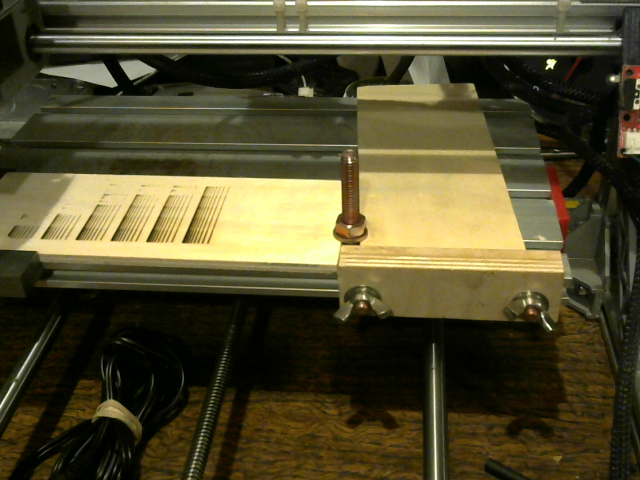

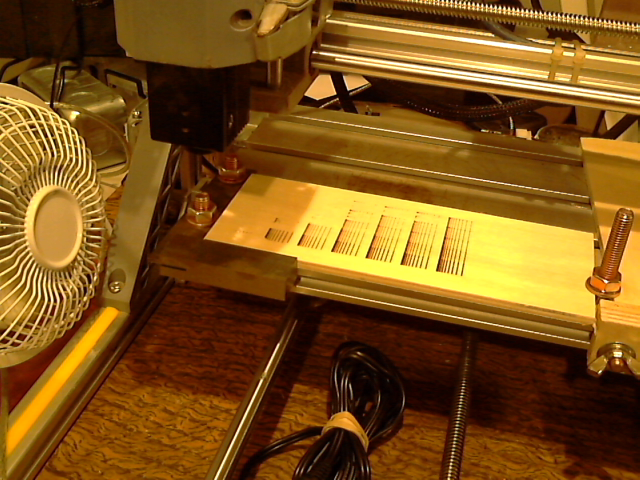

Exception: Reading Failed

In [29]:
%webcam 0 2 
%webcam rtsp://$auth@$ip/cam/realmonitor?channel=1&subtype=0

![](148.jpg)

New CNC3018 and matching laser 'calibration' page etched.

In [33]:
!git add Calibr*ipynb

In [34]:
!git commit -am "Success!"

[master d6baabf] Success!
 11 files changed, 5896 insertions(+), 76 deletions(-)
 create mode 100644 Development/CalibrationRectangle_150x50-Copy1.ipynb
 create mode 100644 Development/CalibrationRectangle_150x50-Copy2.ipynb
 create mode 100644 Development/CalibrationRectangle_150x50-Copy3.ipynb
 create mode 100644 Development/CalibrationRectangle_150x50-Copy4.ipynb
 create mode 100644 Development/CalibrationRectangle_150x50-Copy5.ipynb
 create mode 100644 Development/CalibrationRectangle_150x50-Copy6.ipynb
 create mode 100644 Development/CalibrationRectangle_150x50-FAILURE_EXAMPLE.ipynb
 create mode 100644 Development/CalibrationRectangle_150x50.ipynb


In [35]:
!git tag v0.4.9

In [38]:
!git remote -v

origin	https://github.com/jed-frey/python_Grbl.git (fetch)
origin	https://github.com/jed-frey/python_Grbl.git (push)


In [39]:
!git remote set-url --push origin 

usage: git remote [-v | --verbose]
   or: git remote add [-t <branch>] [-m <master>] [-f] [--tags | --no-tags] [--mirror=<fetch|push>] <name> <url>
   or: git remote rename <old> <new>
   or: git remote remove <name>
   or: git remote set-head <name> (-a | --auto | -d | --delete | <branch>)
   or: git remote [-v | --verbose] show [-n] <name>
   or: git remote prune [-n | --dry-run] <name>
   or: git remote [-v | --verbose] update [-p | --prune] [(<group> | <remote>)...]
   or: git remote set-branches [--add] <name> <branch>...
   or: git remote get-url [--push] [--all] <name>
   or: git remote set-url [--push] <name> <newurl> [<oldurl>]
   or: git remote set-url --add <name> <newurl>
   or: git remote set-url --delete <name> <url>

    -v, --verbose         be verbose; must be placed before a subcommand



!